In [ ]:
# Run this only when pulling data for the first time
%run 01-sql.py

In [1]:
# Run this when data is local
%run 01b-load_local.py

DataFrame loaded into base, 1558278 records
DataFrame loaded into lookup, 1558278 records


C:\Users\dfeng\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\io\parsers.py:1130: DtypeWarning: Columns (8,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [2]:
import pandas as pd
from seaborn import plt
import seaborn as sns
%matplotlib inline

base.describe().T

,count,mean,std,min,25%,50%,75%,max
ASSESSED_LAND_VALUE,1558278,173641.223270,306787.064111,0.000000,46616.000000,101761.000000,206400.000000,1.134974e+08
ASSESSED_TOTAL_VALUE,1558278,204622.388653,239538.804009,0.000000,83766.000000,160509.000000,261788.500000,7.808417e+07
ASSESSED_IMP_VALUE,1558278,378263.611922,471608.242032,0.000000,144973.250000,281639.000000,478592.750000,1.134974e+08
ZIP,1558278,94742.482704,392.571872,93109.000000,94534.000000,94597.000000,95051.000000,9.600100e+04
BATH,1558278,1.985419,0.946865,0.000000,1.000000,2.000000,2.500000,2.000000e+01
BED,1558278,2.880011,1.392383,0.000000,2.000000,3.000000,4.000000,2.000000e+01
AGE,1466427,44.196920,24.995731,0.000000,25.000000,43.000000,58.000000,1.990000e+02
PARKING,1558278,1.272550,11.772471,0.000000,0.000000,1.000000,2.000000,2.700000e+03
TOTAL_UNITS,1558278,0.215387,0.933769,0.000000,0.000000,0.000000,0.000000,3.000000e+02
LAND_USE,1558278,1162.220699,1023.554382,1001.000000,1001.000000,1001.000000,1001.000000,8.001000e+03


## Zero-handling Analysis

In [7]:
# how bad are the zeros?

for i in base.columns:
    print i + ': ' + str((base[i] == 0).sum())

ASSESSED_LAND_VALUE: 1694
ASSESSED_TOTAL_VALUE: 41902
ASSESSED_IMP_VALUE: 1669
ZIP: 0
BATH: 98502
BED: 180468
AGE: 486
STORIES: 0
GARAGE_TYPE: 0
PARKING: 650849
TOTAL_UNITS: 1314170
LAND_USE: 0
POOL: 0
FIREPLACE: 0
PROPERTY_TYPE: 0
BUILDING_AREA: 73916
LOT_SIZE: 0
FIDELITY_LATITUDE: 9081
FIDELITY_LONGITUDE: 9081


Large # of properties with no bath, no bed, have to check if it's right or if it's studio.

In [8]:
print zip(lookup.iloc[9], lookup.iloc[19], lookup.iloc[20], lookup.iloc[21], lookup.iloc[22]), lookup.iloc[1558181]
base[base.BED == 0].head()

[('412 BRUSH ST', '373 4TH ST', '373 4TH ST', '373 4TH ST', '373 4TH ST')] full_address    1311 65TH ST
Name: 1558181, dtype: object


,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,LAND_USE,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
9,9139,11251,20390,94607,0,0,119,NaN,NaN,0,0,1001,NaN,NaN,NaN,736,1875,37.800795,-122.281557
19,139200,324800,464000,94607,1,0,100,3,NaN,0,0,1004,NaN,NaN,NaN,1700,8234,37.797090,-122.273072
20,106200,247800,354000,94607,1,0,100,3,NaN,0,0,1004,NaN,NaN,NaN,1500,8234,37.797090,-122.273072
21,24798,235588,260386,94607,1,0,100,3,NaN,0,0,1004,NaN,NaN,NaN,1700,8234,37.797090,-122.273072
22,156000,364000,520000,94607,1,0,100,3,NaN,0,0,1004,NaN,NaN,NaN,1850,8234,37.797090,-122.273072


In [9]:
pd.concat([lookup, base[base.BATH == 0]], join = 'inner', axis = 1).head()

,full_address,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,LAND_USE,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
9,412 BRUSH ST,9139,11251,20390,94607,0,0,119,NaN,NaN,0,0,1001,NaN,NaN,NaN,736,1875.00,37.800795,-122.281557
29,311 4TH ST,87900,205100,293000,94607,0,0,10,1,NaN,0,0,1004,NaN,NaN,NaN,1072,1.03,37.796396,-122.271534
30,126 4TH ST,115500,269500,385000,94607,0,0,10,1,NaN,0,0,1004,NaN,NaN,NaN,1157,1.03,37.795007,-122.267178
31,311 4TH ST,105900,247100,353000,94607,0,0,10,1,NaN,0,0,1004,NaN,NaN,NaN,1061,1.03,37.796396,-122.271534
32,311 4TH ST,123000,287000,410000,94607,0,0,10,1,NaN,0,0,1004,NaN,NaN,NaN,1115,1.03,37.796396,-122.271534


Looking up a few cases reveals that 0 bed/bath tends to be error data, with no immediate pattern (e.g. small, big homes and condos all have this problem). Going to drop them all and not worry about them.

In [10]:
pd.concat([lookup, base[base.STORIES == '0']], axis=1, join = 'inner').head()

,full_address,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,LAND_USE,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
845386,1240 MOUNTAIN VIEW RD,458873,143395,602268,93109,1.75,2,50,0,NaN,0,0,1001,NaN,1,NaN,1344,9148,34.410187,-119.718668
845387,1250 MOUNTAIN VIEW RD,205110,128999,334109,93109,1.75,4,46,0,NaN,0,0,1001,NaN,1,NaN,1542,10019,34.410228,-119.718885
845388,1260 MOUNTAIN VIEW RD,26302,54269,80571,93109,1.75,3,51,0,C,0,0,1001,NaN,NaN,NaN,1244,9583,34.410269,-119.719100
845389,1268 MOUNTAIN VIEW RD,26301,57554,83855,93109,2.00,3,50,0,NaN,0,0,1001,NaN,1,NaN,1242,12632,34.410302,-119.719273
845390,1276 MOUNTAIN VIEW RD,518000,196000,714000,93109,1.75,2,52,0,A,0,0,1001,NaN,1,NaN,1205,13504,34.410335,-119.719446


Stories == 0 seems like bad data (a lot of Santa Barbara addresses, which shouldn't be in here). Remove. In any case, not apparent what the right number should be.

## Error-handling Analysis

In [3]:
len(base) - base.count() # how many errors?

ASSESSED_LAND_VALUE           0
ASSESSED_TOTAL_VALUE          0
ASSESSED_IMP_VALUE            0
ZIP                           0
BATH                          0
BED                           0
AGE                       91851
STORIES                  500500
GARAGE_TYPE              405435
PARKING                       0
TOTAL_UNITS                   0
LAND_USE                      0
POOL                    1426877
FIREPLACE               1342550
PROPERTY_TYPE           1485611
BUILDING_AREA                 0
LOT_SIZE                      0
FIDELITY_LATITUDE             0
FIDELITY_LONGITUDE            0
dtype: int64

In [12]:
test = base[base.AGE.isnull()]
pd.concat([lookup, test], axis = 1, join = 'inner').tail()

,full_address,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,LAND_USE,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
1558271,881 JONES ST,900,2100,3000,94710,0,0,NaN,NaN,NaN,0,0,1001,NaN,NaN,NaN,0,200,37.875534,-122.298624
1558274,6000 GRIZZLY PEAK BLVD,337,0,337,94611,0,0,NaN,NaN,NaN,0,0,1001,NaN,NaN,NaN,0,809,37.852437,-122.208045
1558275,GRIZZLY PEAK BLVD,146112,2526,148638,94611,0,0,NaN,NaN,NaN,0,0,1999,NaN,NaN,NaN,0,17071,37.852205,-122.207129
1558276,9TH ST,2665,1142,3807,94710,0,0,NaN,NaN,NaN,0,0,1999,NaN,NaN,NaN,0,2410,37.869705,-122.293922
1558277,2333 VINE ST,29321,4950,34271,94708,0,0,NaN,NaN,NaN,0,0,1999,NaN,NaN,NaN,0,4037,37.881073,-122.263458


Missing Age data appears non-trivial; cross-reference of test cases with other data sources shows there should be an age. Raw data probably not right, impute by removing records with missing-age data

In [5]:
print len(base.STORIES[base.STORIES.isnull()])
print base.STORIES.value_counts()

500500
1       387807
1.0     285379
2       193544
2.0     102671
1.5      60710
3        11036
3.0       5048
2+B       3455
0         1972
2.5       1765
1+B       1304
4.0       1258
2+         468
3+B        385
5.0        272
4          179
25.0       149
11.0       118
3.5         53
12.0        53
17.0        30
1.5         24
7.0         17
5           13
8.0         13
6.0         12
20.0        10
6            6
8            5
4.5          3
93.0         2
10.0         2
9.0          2
2.5          2
12           2
31.0         1
9            1
11           1
S/L          1
20           1
7            1
15           1
6.5          1
23.0         1
dtype: int64


In [15]:
pd.concat([lookup, base[base.STORIES > 50]], join = 'inner', axis = 1).head()

,full_address,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,LAND_USE,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
722298,2360 W TWITCHELL ISLAND RD,85711,171599,257310,94571,3.0,4,44,1,G,1,0,1008,P,Y,NaN,2618,10.88,38.123537,-121.665171
722299,18110 SHRMN IS E LV RD,23497,73951,97448,94571,2.0,3,64,1,G,8,0,1008,NaN,NaN,NaN,1666,25.00,38.091531,-121.712234
722300,18075 STATE HIGHWAY 160,157965,470185,628150,94571,2.0,3,5,2,G,9,0,1008,NaN,NaN,NaN,3096,3.87,38.098581,-121.704634
722301,17210 SHRMN IS E LV RD,91772,525751,617523,94571,2.5,4,4,2,G,3,0,1101,NaN,Y,NaN,3190,2.05,38.098581,-121.704634
722302,4361 LELIA DR,4952,23044,27996,94571,1.0,3,49,2,NaN,0,0,1001,NaN,Y,NaN,1150,5415.00,38.074422,-121.753927


Have to clean up the '+B' and convert to float. Not sure what 0.5 means but roll with it

In [16]:
pd.concat([lookup, base[base.STORIES.isnull()]], join = 'inner', axis = 1).tail(5)

,full_address,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,LAND_USE,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
1558273,6000 GRIZZLY PEAK BLVD,207728,629820,837548,94611,3,3,38,NaN,NaN,0,0,1001,NaN,NaN,NaN,1925,16842,37.852437,-122.208045
1558274,6000 GRIZZLY PEAK BLVD,337,0,337,94611,0,0,NaN,NaN,NaN,0,0,1001,NaN,NaN,NaN,0,809,37.852437,-122.208045
1558275,GRIZZLY PEAK BLVD,146112,2526,148638,94611,0,0,NaN,NaN,NaN,0,0,1999,NaN,NaN,NaN,0,17071,37.852205,-122.207129
1558276,9TH ST,2665,1142,3807,94710,0,0,NaN,NaN,NaN,0,0,1999,NaN,NaN,NaN,0,2410,37.869705,-122.293922
1558277,2333 VINE ST,29321,4950,34271,94708,0,0,NaN,NaN,NaN,0,0,1999,NaN,NaN,NaN,0,4037,37.881073,-122.263458


Found examples of 1- and 2-storey buildings which are null in my data, looks like it's due to outdated raw data, so removing. It looks particularly ill-defined for condos and multi-family residences.

In [17]:
base.PROPERTY_TYPE.value_counts()

SFR    42063
PUD    12089
CND     9549
MFD     6318
RES     1680
2ND      934
MFG       25
MOH        4
LAN        3
COM        1
AGR        1
dtype: int64

PROPERTY_TYPE does not look useful, the missing data appears to be non-trivial<br>
**update** Thanks to this, found out from engineer that I should use LAND_USE, and got a dictionary out of it.

In [18]:
base.LAND_USE.value_counts()

1001    1205326
1004     131920
1009      60703
8001      34048
1008      32997
1110      32492
1101      31285
1002      13076
1103       7041
1102       4864
1999       3888
1006        295
1016        235
1005        108
dtype: int64

In [3]:
lu_ptype = {
            1001 : 'SFR',
            1002 : 'TOWNHOUSE',
            1003 : 'CLUSTER HOME',
            1004 : 'CONDO',
            1005 : 'COOP',
            1006 : 'MOBILE',
            1007 : 'ROW HOUSE',
            1009 : 'SFR-PUD',
            1101 : 'MFR',
            1102 : 'MFR',
            1103 : 'MFR',
            1110 : 'MFR'
            }

base['ptype'] = base.LAND_USE.map(lu_ptype)
base.ptype

0       SFR
1       SFR
2       SFR
3       SFR
4       MFR
5       MFR
6       MFR
7       SFR
8       MFR
9       SFR
10      SFR
11      MFR
12    CONDO
13      SFR
14      SFR
...
1558263    TOWNHOUSE
1558264    TOWNHOUSE
1558265    TOWNHOUSE
1558266    TOWNHOUSE
1558267    TOWNHOUSE
1558268          SFR
1558269          SFR
1558270        CONDO
1558271          SFR
1558272          SFR
1558273          SFR
1558274          SFR
1558275          NaN
1558276          NaN
1558277          NaN
Name: ptype, Length: 1558278, dtype: object

In [4]:
print len(base[base.ptype.isnull()])
print len(base[base.LAND_USE.isnull()])
print base.ptype.value_counts()

71168
0
SFR          1205326
CONDO         131920
MFR            75682
SFR-PUD        60703
TOWNHOUSE      13076
MOBILE           295
COOP             108
dtype: int64


In [5]:
print base.LAND_USE[base.ptype.isnull()].value_counts()
print base.PROPERTY_TYPE.value_counts()
print base.PROPERTY_TYPE[base.ptype.isnull()].value_counts()
base[(base.ptype.isnull()) & (base.ASSESSED_TOTAL_VALUE == 0)].tail()

8001    34048
1008    32997
1999     3888
1016      235
dtype: int64
SFR    42063
PUD    12089
CND     9549
MFD     6318
RES     1680
2ND      934
MFG       25
MOH        4
LAN        3
COM        1
AGR        1
dtype: int64
SFR    706
PUD    192
2ND    139
MFD     63
RES     27
MFG      7
CND      4
LAN      2
dtype: int64


,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,LAND_USE,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE,ptype
1558233,9544,0,9544,94806,0,0,NaN,NaN,NaN,0,0,8001,NaN,NaN,NaN,0,2500.0,37.971278,-122.343621,NaN
1558236,1530000,0,1530000,94563,0,0,NaN,NaN,NaN,0,0,8001,NaN,NaN,NaN,0,1.1,37.900615,-122.194385,NaN
1558238,70775,0,70775,94563,0,0,NaN,NaN,NaN,0,0,8001,NaN,NaN,NaN,0,41800.0,37.894282,-122.207369,NaN
1558244,61428,0,61428,94553,0,0,NaN,NaN,NaN,0,0,8001,NaN,NaN,NaN,0,5175.0,38.007590,-122.116865,NaN
1558246,4226,0,4226,94803,0,0,NaN,NaN,NaN,0,0,8001,NaN,NaN,NaN,0,5400.0,37.963988,-122.293365,NaN


In [6]:
print base.GARAGE_TYPE.value_counts()
print len(base[base.GARAGE_TYPE.isnull()])

G    736371
Y    357703
C     34295
V     19365
M      4455
O       322
A       273
D        55
B         2
N         2
dtype: int64
405435


In [7]:
print base.POOL.value_counts()
print len(base[base.POOL.isnull()])

P    122689
B      7537
S      1154
H        21
dtype: int64
1426877


In [145]:
print base.FIREPLACE.value_counts()
print len(base[base.FIREPLACE.isnull()])

Y      112459
1.0     60897
1       30419
2.0      6787
2        3599
3.0       836
3         559
4.0        79
4          65
5.0        12
5           6
6           4
6.0         2
7.0         1
9.0         1
7           1
9           1
dtype: int64
1342550


In [146]:
print base.TOTAL_UNITS.value_counts()
print len(base[base.TOTAL_UNITS.isnull()])

0     1314170
1      192791
2       32722
4       11340
3        6567
5         157
6         103
8          71
7          45
10         43
9          31
12         25
11         18
16         12
32         11
...
111    1
37     1
109    1
100    1
99     1
98     1
76     1
72     1
71     1
66     1
64     1
48     1
47     1
254    1
43     1
Length: 82, dtype: int64
0


In [71]:
print base.PARKING.value_counts()
print len(base[base.PARKING.isnull()])
pd.concat([lookup, base[base.PARKING < 50]], join = 'inner', axis = 1).sort(columns = 'PARKING').tail(5).T

2     651750
0     650849
1     188775
3      44473
4      16762
5       2822
6       1147
7        396
8        309
9         95
24        72
76        67
10        61
22        59
13        48
...
1364    1
340     1
336     1
330     1
329     1
325     1
320     1
688     1
307     1
300     1
289     1
588     1
286     1
282     1
379     1
Length: 225, dtype: int64
0


,1004069,1255046,1144625,1026391,908912
full_address,645 NIDO DR,14255 SYCAMORE DR,14777 MONTALVO RD,23019 VOSS AVE,751 LOS ALTOS AVE
ASSESSED_LAND_VALUE,159184,341600,770372,1000000,567268
ASSESSED_TOTAL_VALUE,363863,417600,903437,237000,609291
ASSESSED_IMP_VALUE,523047,759200,1673809,1237000,1176559
ZIP,95008,95037,95070,95014,94022
BATH,0,2.5,3.5,2.5,3
BED,0,4,4,4,3
AGE,44,21,32,28,18
STORIES,2,1,1,2,1
GARAGE_TYPE,V,G,G,G,G


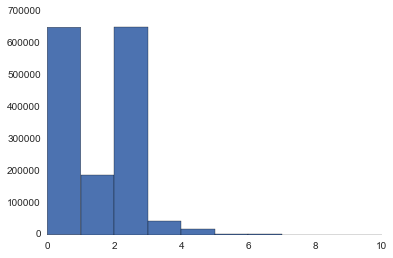

In [75]:
base.PARKING[base.PARKING <= 10].hist()

In [148]:
pd.concat([lookup, base[base.TOTAL_UNITS.isnull()]], join = 'inner', axis = 1).tail(5)
pd.concat([lookup, base[base.TOTAL_UNITS == 111]], join = 'inner', axis = 1).tail(5)

,full_address,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
1510456,8200 FOOTHILL RANCH RD,449888,489253,939141,95404,3,3,22,1,NaN,0,111,NaN,1,NaN,2614,9.67,38.519323,-122.677983


## Derivative Metrics
I notice lot_size appears to be sometimes in sq ft, sometimes in acres. Using the rule below to catch them, but it's not perfect. Going to remove all cases where BUILDING_AREA > LOT_SIZE (BUILDING_AREA looks wrong sometimes too), which might bias against condos, MFRs.

In [8]:
base[base.LOT_SIZE < base.BUILDING_AREA].head()
test = pd.concat([lookup, base[(base.LOT_SIZE < base.BUILDING_AREA) & (base.LOT_SIZE < 100)]], join = 'inner', axis = 1)
# test = pd.concat([lookup, base[base.LOT_SIZE < base.BUILDING_AREA / 10]], join = 'inner', axis = 1)
test2 = test.sort(columns = ['LOT_SIZE'], ascending = False)
test2.head()

,full_address,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,...,TOTAL_UNITS,LAND_USE,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE,ptype
701510,2990 MONTICELLO RD,82498,57479,139977,94558,1.0,1,29,NaN,NaN,...,0,1008,NaN,NaN,NaN,896,99.010002,38.338386,-122.295914,NaN
68502,4601 GRASS VALLEY RD,129975,233754,363729,94605,3.5,4,21,1,G,...,0,1001,P,NaN,NaN,2993,94.970001,37.750859,-122.121664,SFR
700525,6210 DRY CREEK RD,117577,102120,219697,94558,2.0,1,52,NaN,NaN,...,0,1008,P,Y,NaN,1128,94.680000,38.408119,-122.441856,NaN
350771,1963 CYPRESS CT,54982,204608,259590,94561,3.0,5,21,NaN,Y,...,0,1001,NaN,NaN,NaN,2345,91.959999,37.989829,-121.730608,SFR
972313,810 WASHINGTON ST,23902,50813,74715,95050,1.0,2,NaN,1,G,...,0,1001,NaN,NaN,NaN,1357,91.199997,37.347996,-121.942794,SFR


In [4]:
# Trying to tease out acres by 2 decimal paces. Did not work, 
# there are acres with >2 decimal places and sq ft with 2 decimal places.

def acres_finder(num):
    import re
    if re.search('.+\...$', str(num)):
        return 1

test = base.LOT_SIZE.map(acres_finder)
base[test == 1].sort(columns = 'LOT_SIZE', ascending = False).head()

,ASSESSED_LAND_VALUE,ASSESSED_TOTAL_VALUE,ASSESSED_IMP_VALUE,ZIP,BATH,BED,AGE,STORIES,GARAGE_TYPE,PARKING,TOTAL_UNITS,LAND_USE,POOL,FIREPLACE,PROPERTY_TYPE,BUILDING_AREA,LOT_SIZE,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
800627,67611,118335,185946,94110,2,0,94,2,NaN,0,0,1110,NaN,NaN,NaN,1505,1331.53,37.748606,-122.408093
655042,149199,246616,395815,94952,0,0,NaN,NaN,NaN,0,2,1008,NaN,NaN,NaN,0,483.91,38.154225,-122.714554
1283990,173551,419527,593078,94571,2,2,4,NaN,G,2,0,1001,NaN,NaN,NaN,2680,474.97,38.198221,-121.783699
1539193,228943,51585,280528,94956,0,0,NaN,NaN,NaN,0,2,1008,NaN,NaN,NaN,0,471.25,0.000000,0.000000
652103,123381,614385,737766,94952,3,3,18,NaN,Y,3,2,1008,NaN,NaN,NaN,4319,438.25,38.202801,-122.779729


# Before and After

In [3]:
lu_ptype = {
            1001 : 'SFR',
            1002 : 'TOWNHOUSE',
            1003 : 'CLUSTER HOME',
            1004 : 'CONDO',
            1005 : 'COOP',
            1006 : 'MOBILE',
            1007 : 'ROW HOUSE',
            1009 : 'SFR-PUD',
            1101 : 'MFR',
            1102 : 'MFR',
            1103 : 'MFR',
            1110 : 'MFR'
            }

base['ptype'] = base.LAND_USE.map(lu_ptype)

basef = base

basef = basef[basef.ASSESSED_TOTAL_VALUE > 0] # remove Land
basef = basef[basef.FIDELITY_LATITUDE > 0] # remove properties with no lat/long information
basef = basef[basef.ASSESSED_LAND_VALUE > 0] # remove properties with no land value
basef = basef[basef.BUILDING_AREA > 0] # remove properties with no land value
basef = basef[basef.BED > 0]
basef = basef[basef.BATH > 0]
basef = basef[basef.STORIES > 0]

basef2 = basef

basef2 = basef2[basef2.AGE.notnull()]
basef2 = basef2[basef2.ptype.notnull()]
basef2 = basef2[basef2.STORIES.notnull()]

basef2 = basef2[basef2.STORIES != 'S/L']
basef2.STORIES = basef2.STORIES.replace(r'\+B*', '', regex = True)
basef2.STORIES = basef2.STORIES.astype(float)

# looks like lot size has mixed units (feet, acres): I'll attempt to convert acres to feet using the following rule:
basef2['lsize_sqft'] = basef2.LOT_SIZE.apply(lambda x: x * 43560 if x < 100 and x < basef2.BUILDING_AREA.iteritems() else x)

basef2['landval_perc'] = basef2.ASSESSED_LAND_VALUE / basef2.ASSESSED_IMP_VALUE
basef2['lot_perc'] = 1 - basef2.BUILDING_AREA / basef2.lsize_sqft

basef2 = basef2[basef2.lot_perc >= -0.1]
basef2 = basef2[basef2.PARKING <= 10]
basef2 = basef2[basef2.TOTAL_UNITS < 3.5]
basef2 = basef2[basef2.STORIES < 4.5]
len(basef2)

869044

    1. Mapped LAND_USE to ptype
    2. Normalized LOT_SIZE to sq feet by assuming it's in acres if it's < 100 (see 3a)
    3. Created lot_perc (% of lot size that is not-building) and landval_perc (ASSESSED_LAND_VALUE/ASSESSED_IMP_VALUE)
        a. Removed cases where BUILDING_AREA was bigger than LOT_SIZE by > 10% (49860)
    4. Stripped out '+B' appendage in STORIES (e.g. 2+B)
    5. Removed records with:
       a. ASSESSED_TOTAL_VALUE == 0 (41902) -- Land-only parcels
       b. ASSESSED_LAND_VALUE == 0 (1694)
       c. FIDELITY_LATITUDE == 0 (9081) -- no lat/long info
       d. BUILDING_AREA == 0 (73916)
       e. BED == 0 (180468)
       f. BATH == 0 (98502)
       g. STORIES == 0 (small) -- Santa Barbara case
       h. AGE NaNs (91851)
       i. ptype NaNs (20849) -- likely Land or Commercial
       j. STORIES NaNs (500500) -- was conflated with something else
       k. PARKING > 10 -- probably sq ft
    6. After scaling data, determined STORIES and TOTAL_UNITS need more pruning
       a. Removed anything above 5 standard deviations from the mean -- what are you still doing in here??
        
Started with 1558278 records, ended with 866945

In [4]:
from mpl_toolkits.basemap import Basemap
%matplotlib inline
from seaborn import plt

bayarea  = Basemap(projection='merc', lat_0=((37.2056+38.385)/2), lon_0 = ((-122.791-121.667)/2),
                   llcrnrlat = 37.205572, llcrnrlon = -122.791252,
                   urcrnrlat = 38.385387, urcrnrlon = -121.667213,
                   resolution = 'h', area_thresh = 0.001)

sf = Basemap(projection='merc', lat_0=((37.7077+37.8339)/2), lon_0=((-122.511243-122.361039)/2),
             llcrnrlat = 37.707739, llcrnrlon = -122.511243,
             urcrnrlat = 37.833933, urcrnrlon = -122.361039,
             resolution = 'h', area_thresh = 0.001)

# northbay = Basemap()

# southbay = Basemap()

eastbay = Basemap(projection='merc', lat_0=((37.796+37.9026)/2), lon_0=((-122.318-122.204)/2),
                  llcrnrlat = 37.796372, llcrnrlon = -122.318089,
                  urcrnrlat = 37.902642, urcrnrlon = -122.204105,
                  resolution = 'h', area_thresh = 0.001)

1558278 869044 1558278


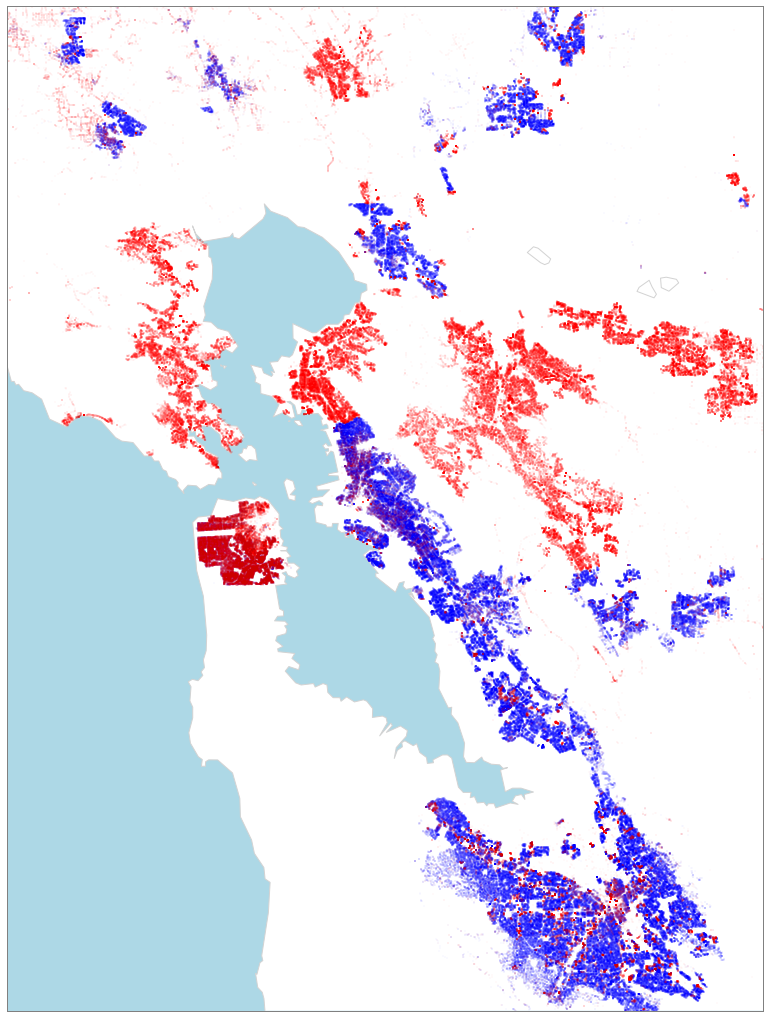

In [5]:
combined = pd.merge(base, basef2, how = 'left', left_index = True, right_index = True)
print len(base), len(basef2), len(combined)

plt.figure(figsize=(18,18))
bayarea.drawcoastlines(color='lightgray')
bayarea.drawmapboundary(color='gray', fill_color = 'lightblue')
bayarea.fillcontinents(color = 'white')

lat_orig = combined.FIDELITY_LATITUDE_x[combined.FIDELITY_LATITUDE_y.notnull()].tolist()
lon_orig = combined.FIDELITY_LONGITUDE_x[combined.FIDELITY_LONGITUDE_y.notnull()].tolist()
x_orig,y_orig = bayarea(lon_orig,lat_orig)

bayarea.plot(x_orig, y_orig, 'bo', markersize=1, alpha = 0.1)

lat_rem = combined.FIDELITY_LATITUDE_x[combined.FIDELITY_LATITUDE_y.isnull()].tolist()
lon_rem = combined.FIDELITY_LONGITUDE_x[combined.FIDELITY_LONGITUDE_y.isnull()].tolist()
x_rem,y_rem = bayarea(lon_rem,lat_rem)

bayarea.plot(x_rem, y_rem, 'ro', markersize=1, alpha = 0.1)

# bayarea.drawlsmask(ocean_color = 'navy', resolution = 'h')

plt.show()